### About data

### Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million 
lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart 
attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age.
Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used
to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one
or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) 
need early detection and management wherein a machine learning model can be of great help.

### About the Features
Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

### Target Variable
Target variable, in the machine learning context, is the variable that is or should be the output. For example it could be binary 0 or 1 if you are classifying or it could be a continuous variable if you are doing a regression. In statistics you also refer to it as the response variable.

In our study our target variable is HeartDisease in the contex of determining whether anybody is likely to get hearth disease based on the input parameters like gender, age and various test results or not.

### What the Problem is
In the given study, we have a binary classification problem.
We will make a prection on the target variable HeartDisease
Lastly we will build a variety of Classification models and compare the models giving the best prediction on Heart Disease.

### Reading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("heart.csv ")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### EDA

In [3]:
df.shape

(918, 12)

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

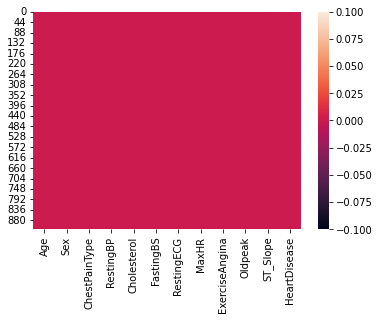

In [9]:
#Visualising 

sns.heatmap(df.isnull())
plt.show()

In [10]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

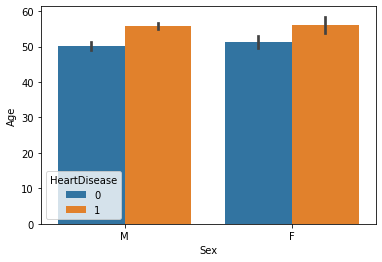

In [11]:
sns.barplot(data=df,y="Age",x="Sex",hue="HeartDisease")
plt.show()

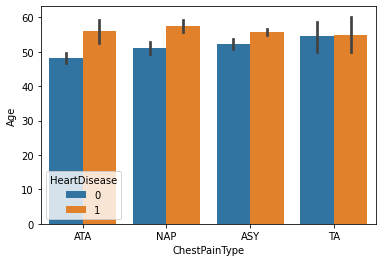

In [12]:
sns.barplot(data=df,y="Age",x="ChestPainType",hue="HeartDisease")
plt.show()

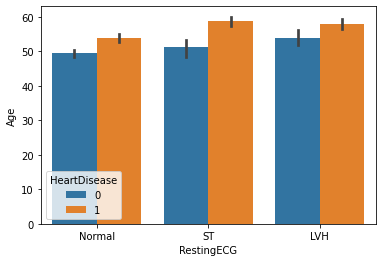

In [13]:
sns.barplot(data=df,y="Age",x="RestingECG",hue="HeartDisease")
plt.show()

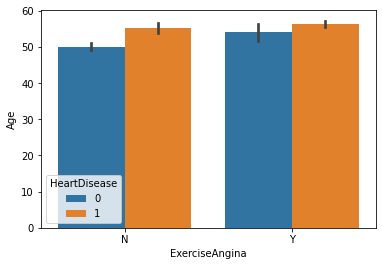

In [14]:
sns.barplot(data=df,y="Age",x="ExerciseAngina",hue="HeartDisease")
plt.show()

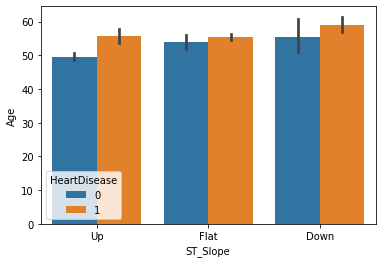

In [15]:
sns.barplot(data=df,y="Age",x="ST_Slope",hue="HeartDisease")
plt.show()

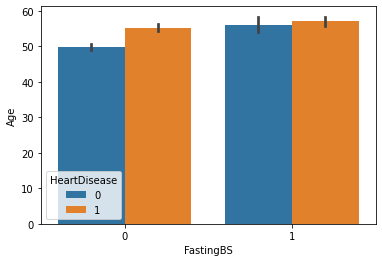

In [16]:
sns.barplot(data=df,y="Age",x="FastingBS",hue="HeartDisease")
plt.show()

In [17]:
df.shape

(918, 12)

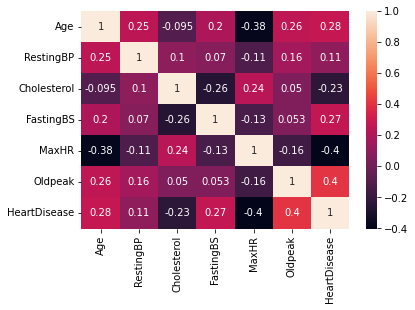

In [18]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [19]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [20]:
#Convert float64 dtype as int64
#df['Oldpeak'] = df['Oldpeak'].astype('int64')

In [21]:
#Convert categorical data into numerical data by using label encoding
df_cat=df.select_dtypes('object')
df_num=df.select_dtypes(['int64','float64'])

In [22]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [23]:
df_cat

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [24]:
columns=df_cat.columns
columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
for col in columns:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [27]:
df_cat.dtypes

Sex               int32
ChestPainType     int32
RestingECG        int32
ExerciseAngina    int32
ST_Slope          int32
dtype: object

In [28]:
df_new=pd.concat([df_cat,df_num],axis=1)
df_new

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,3,1,0,1,45,110,264,0,132,1.2,1
914,1,0,1,0,1,68,144,193,1,141,3.4,1
915,1,0,1,1,1,57,130,131,0,115,1.2,1
916,0,1,0,0,1,57,130,236,0,174,0.0,1


In [29]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [30]:
df_new.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0


In [31]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [32]:
#Here In ChestPaintype ATA:1,NAP:2,ASY:0,TA:3
#Sex M:1,F:0
#RestingECG Normal:1,ST:2\
#ExerciseAngina N:0,Y:1
#ST_Slope UP:2,Flat:1

In [33]:
df_new.nunique()

Sex                 2
ChestPainType       4
RestingECG          3
ExerciseAngina      2
ST_Slope            3
Age                50
RestingBP          67
Cholesterol       222
FastingBS           2
MaxHR             119
Oldpeak            53
HeartDisease        2
dtype: int64

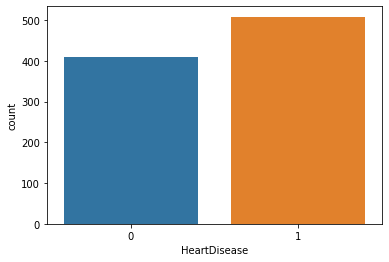

In [34]:
sns.countplot(data=df_new,x='HeartDisease')
f=df_new['HeartDisease'].value_counts()
plt.yticks
plt.show()

In [35]:
#Splitting input and output

X=df_new.drop("HeartDisease",axis=1)
Y=df_new["HeartDisease"]

In [36]:
#Value counts

df_new["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [37]:
#importing test train split
#importing StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [39]:
ss=StandardScaler()
ss

StandardScaler()

In [40]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [41]:
#Creating fucntion

def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

### LOGISTIC REGRESSION

In [42]:
#importing logistic regression function

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [43]:
#Creating an object of logisticRegression

lr=LogisticRegression()

In [44]:
#Showing output of LogisticRegression

lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       109
           1       0.92      0.86      0.89       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276

[[ 96  13]
 [ 24 143]]


### DECISION TREE

In [45]:
#Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier

In [46]:
#Creating Object

dt=DecisionTreeClassifier(random_state=1)

In [47]:
#Getting output

dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.67      0.83      0.74       109
           1       0.87      0.73      0.79       167

    accuracy                           0.77       276
   macro avg       0.77      0.78      0.77       276
weighted avg       0.79      0.77      0.77       276

[[ 91  18]
 [ 45 122]]


In [48]:
#Getting output with entropy

dt1=DecisionTreeClassifier(random_state=1,criterion="entropy")

In [49]:
dt1=create_model(dt1) #entropy is better

              precision    recall  f1-score   support

           0       0.68      0.85      0.76       109
           1       0.89      0.74      0.81       167

    accuracy                           0.79       276
   macro avg       0.78      0.80      0.78       276
weighted avg       0.81      0.79      0.79       276

[[ 93  16]
 [ 43 124]]


### PRUNING TECHNIQUES

### 1.Max Depth technique

In [50]:
#Max_depth technique

dt2=DecisionTreeClassifier(random_state=1,max_depth=3)

In [51]:
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       109
           1       0.84      0.87      0.85       167

    accuracy                           0.82       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.82      0.82      0.82       276

[[ 81  28]
 [ 22 145]]


### 2. Min samples leaf

In [52]:
#Min_samples_leaf

dt3=DecisionTreeClassifier(random_state=1,min_samples_leaf=55)

In [53]:
dt3=create_model(dt3)

#Min sample leaf is the better pruning technique for this dataset

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       109
           1       0.85      0.87      0.86       167

    accuracy                           0.83       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.83      0.83      0.83       276

[[ 84  25]
 [ 22 145]]


In [54]:
#Creating the Decision tree

from sklearn import tree

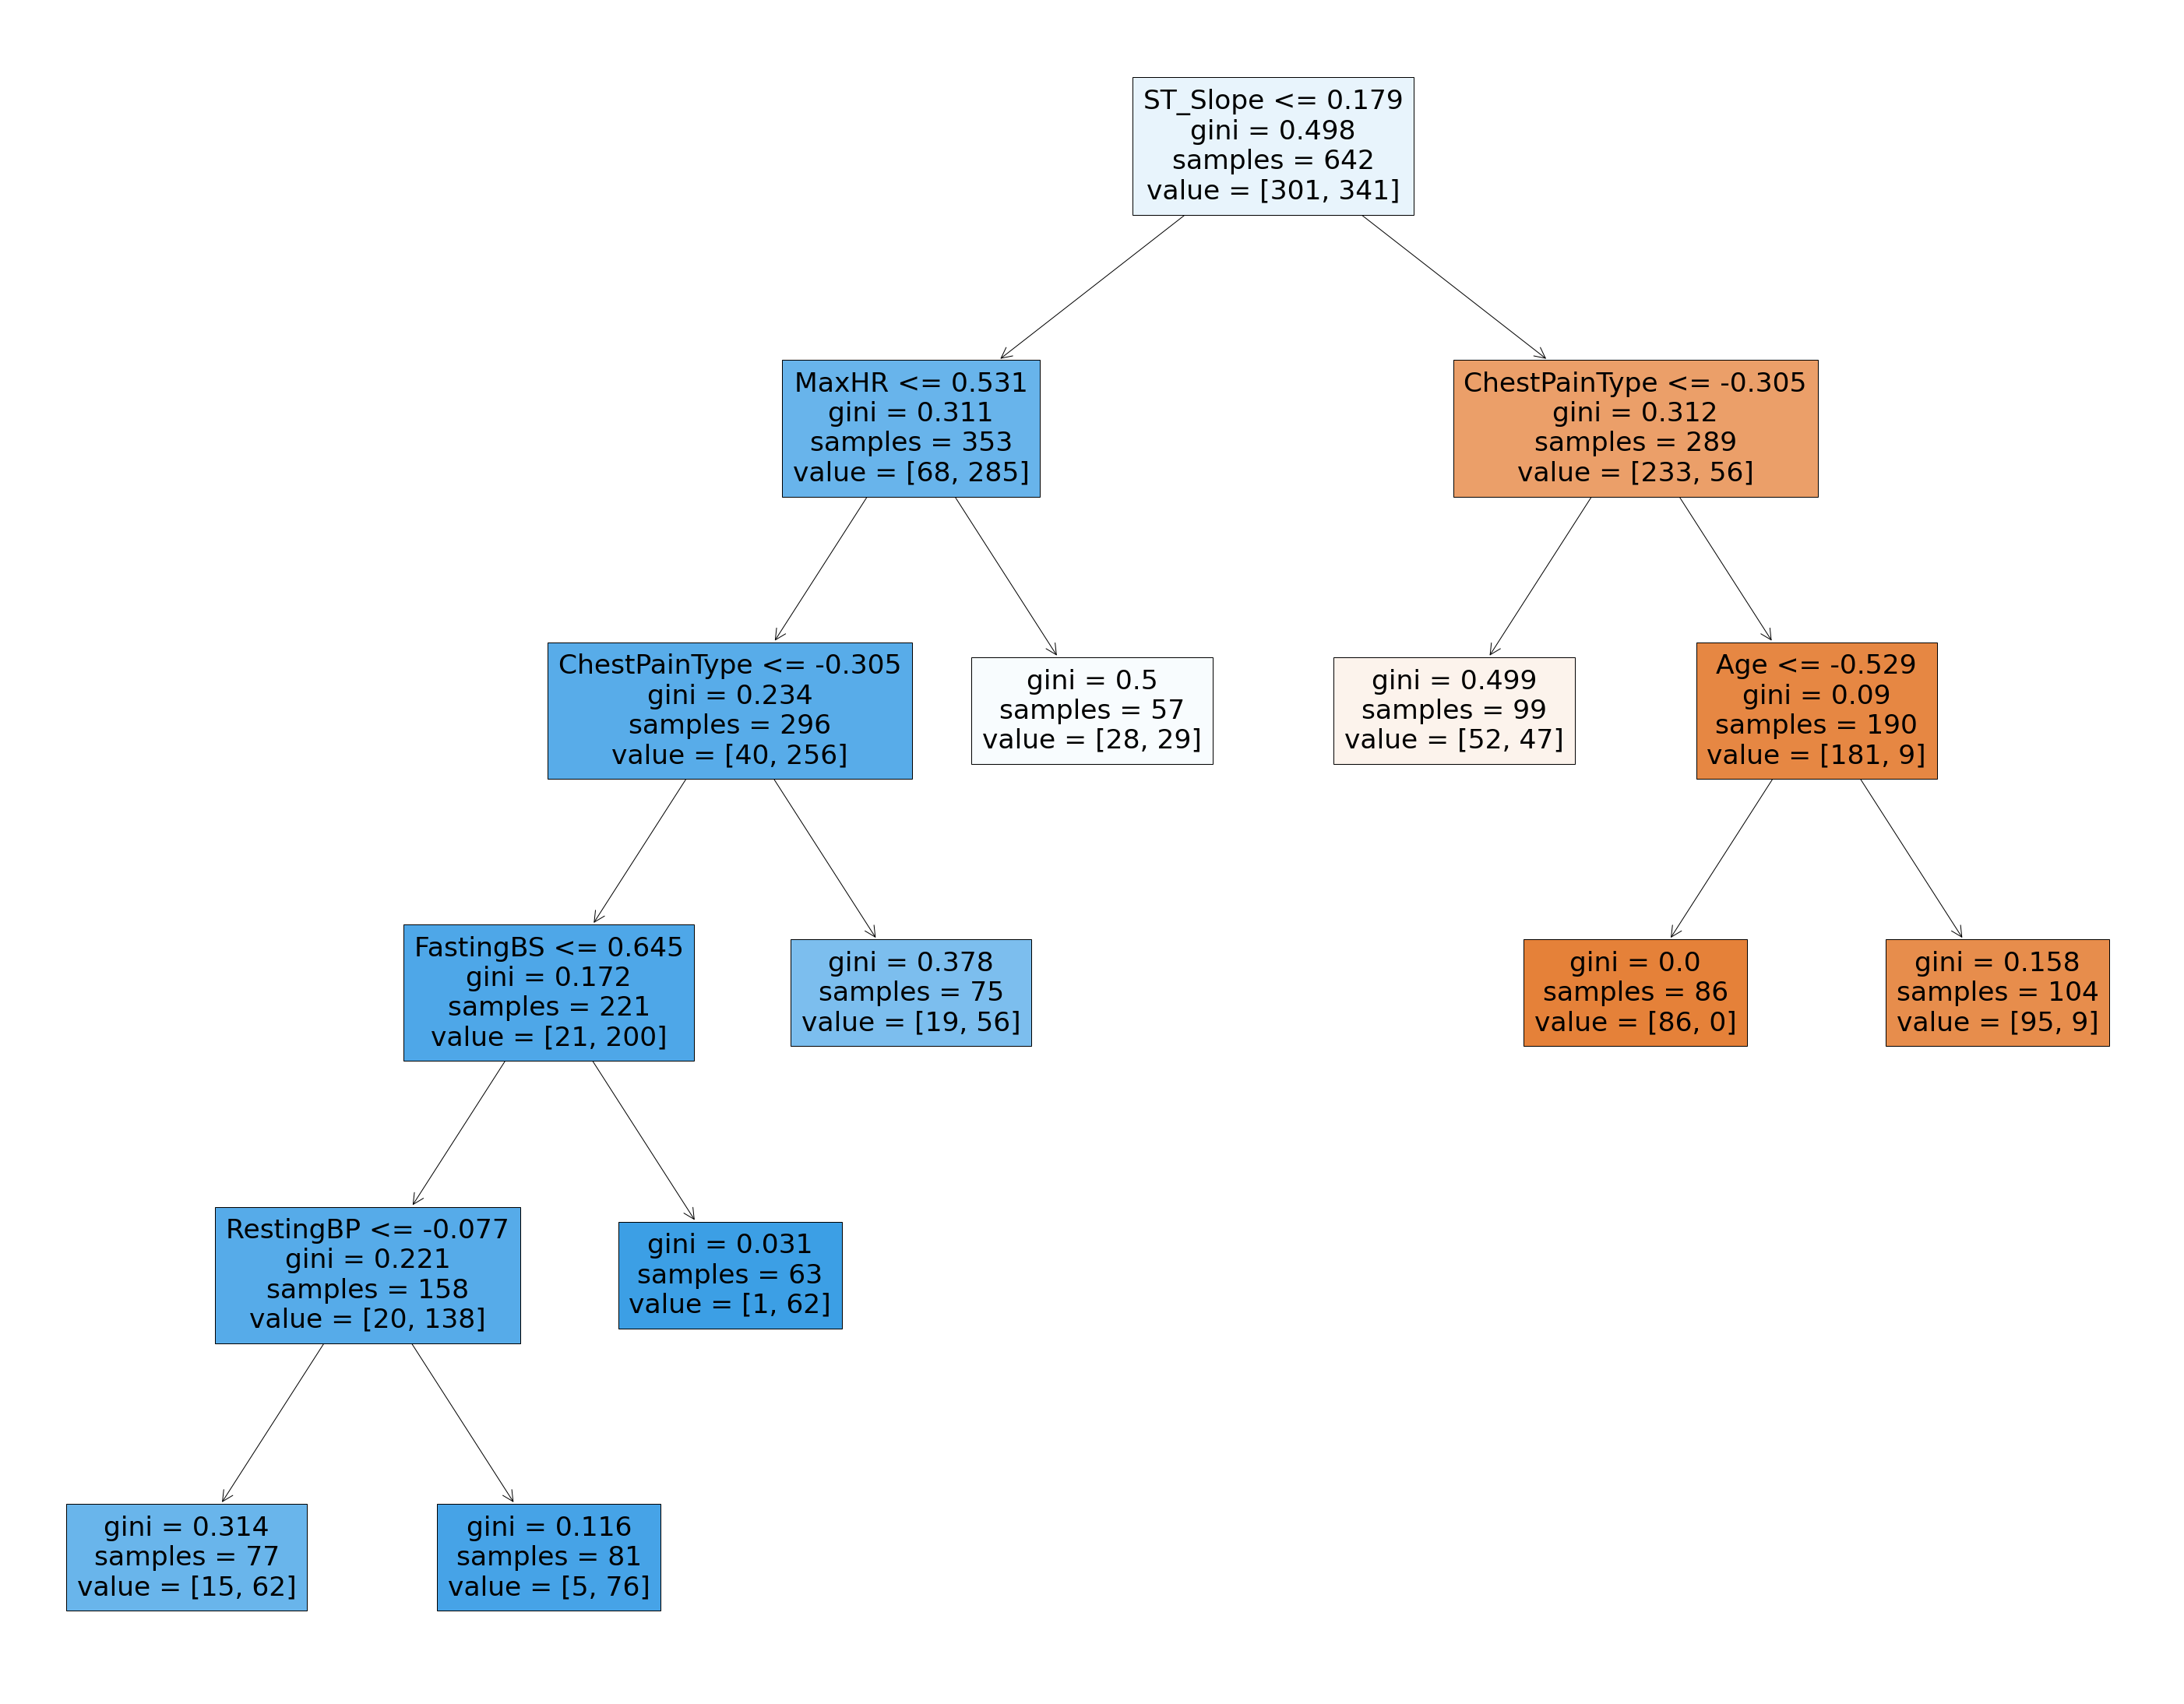

In [55]:
features=X.columns #input features
fig=plt.figure(figsize=(50,40))
_=tree.plot_tree(dt3,feature_names=features,filled=True)

### ENSEMBLING TECHNIQUES

###  1. Random Forest 

In [56]:
#Importing Random Forest technique

from sklearn.ensemble import RandomForestClassifier

In [57]:
df.shape

(918, 12)

In [58]:
#Create an object

rfc=RandomForestClassifier(n_estimators=32,max_features=12,random_state=1)

In [59]:
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       109
           1       0.89      0.84      0.86       167

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.83       276
weighted avg       0.84      0.84      0.84       276

[[ 91  18]
 [ 27 140]]


### 2. ADA Boosting

In [60]:
#Importing Ada boosting

from sklearn.ensemble import AdaBoostClassifier

In [61]:
#Creating an Object for ada boost

ada=AdaBoostClassifier(n_estimators=4,random_state=1)

In [62]:
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       109
           1       0.90      0.87      0.88       167

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276

[[ 92  17]
 [ 22 145]]


### 3.Gradient Boosting

In [63]:
#Importing Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

In [64]:
gbc=GradientBoostingClassifier(n_estimators=12,random_state=1)

In [65]:
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       109
           1       0.89      0.91      0.90       167

    accuracy                           0.88       276
   macro avg       0.88      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276

[[ 91  18]
 [ 15 152]]


### 4. Xtreme Gradient Boosting

In [66]:
#Importing XtremeGradientBoosting

from xgboost import XGBClassifier

In [67]:
xgb=XGBClassifier(n_estimators=16,random_state=1)

In [68]:
xgb=create_model(xgb)

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       109
           1       0.90      0.86      0.88       167

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276

[[ 93  16]
 [ 23 144]]


### Support Vector Machine

In [69]:
#Importing Support Vector Machine

from sklearn.svm import LinearSVC

In [70]:
#Creating an Object for SVC

svc=LinearSVC(random_state=1)

In [71]:
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       109
           1       0.92      0.85      0.88       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276

[[ 97  12]
 [ 25 142]]


In [72]:
#Checking if the model is overfit

svc1=LinearSVC(random_state=1,C=0.001)
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       109
           1       0.93      0.84      0.88       167

    accuracy                           0.86       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.86      0.86       276

[[ 98  11]
 [ 27 140]]


In [73]:
#adding external error during training time ,changes in score(recall)
#means data is linear

### Final Result

### Conclusion
Have tried to a predict classification problem in Heart Disease Dataset by a variety of models to classifiy Heart Disease predictions in the contex of determining whether anybody is likely to get hearth disease based on the input parameters like gender, age and various test results or not.

As in the dataset recall score is very important.So by predicting with various classification problem 'Gradient Boosting' has the best Recall score and it shows the better prediction amongs all the differnet Classification.